In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from ipynb.fs.full.kepler_RK import fct_RK4_2D, fct_RK2_2D
from ipynb.fs.full.kepler_euler import fct_Euler_2D
from ipynb.fs.full.kepler_euler_richardson import fct_Euler_Richardson_2D
from ipynb.fs.full.kepler_verlet import fct_Verlet_2D

Exécution des simulations avec pas fixe h = 0.01
Valeur théorique de T²/a³ = 1.0

Résultats de simulation:
------------------------
     Temps |  Demi-grand axe |    Période |      T²/a³
-------------------------------------------------------
       5.0 |        1.569583 |   1.970000 |   1.003643
      10.0 |        1.569583 |   1.970000 |   1.003643
      20.0 |        1.569583 |   1.970000 |   1.003643
      50.0 |        1.569583 |   1.970000 |   1.003643
     100.0 |        1.569583 |   1.970000 |   1.003643
     200.0 |        1.569583 |   1.970000 |   1.003643
     500.0 |        1.569583 |   1.970000 |   1.003643
    1000.0 |        1.569583 |   1.970000 |   1.003643
    2000.0 |        1.569583 |   1.970000 |   1.003643
    5000.0 |        1.569583 |   1.970000 |   1.003643
   10000.0 |        1.569583 |   1.970000 |   1.003643
   20000.0 |        1.569583 |   1.970000 |   1.003643
   50000.0 |        1.569583 |   1.970000 |   1.003643
  100000.0 |        1.569583 |   1.970000 

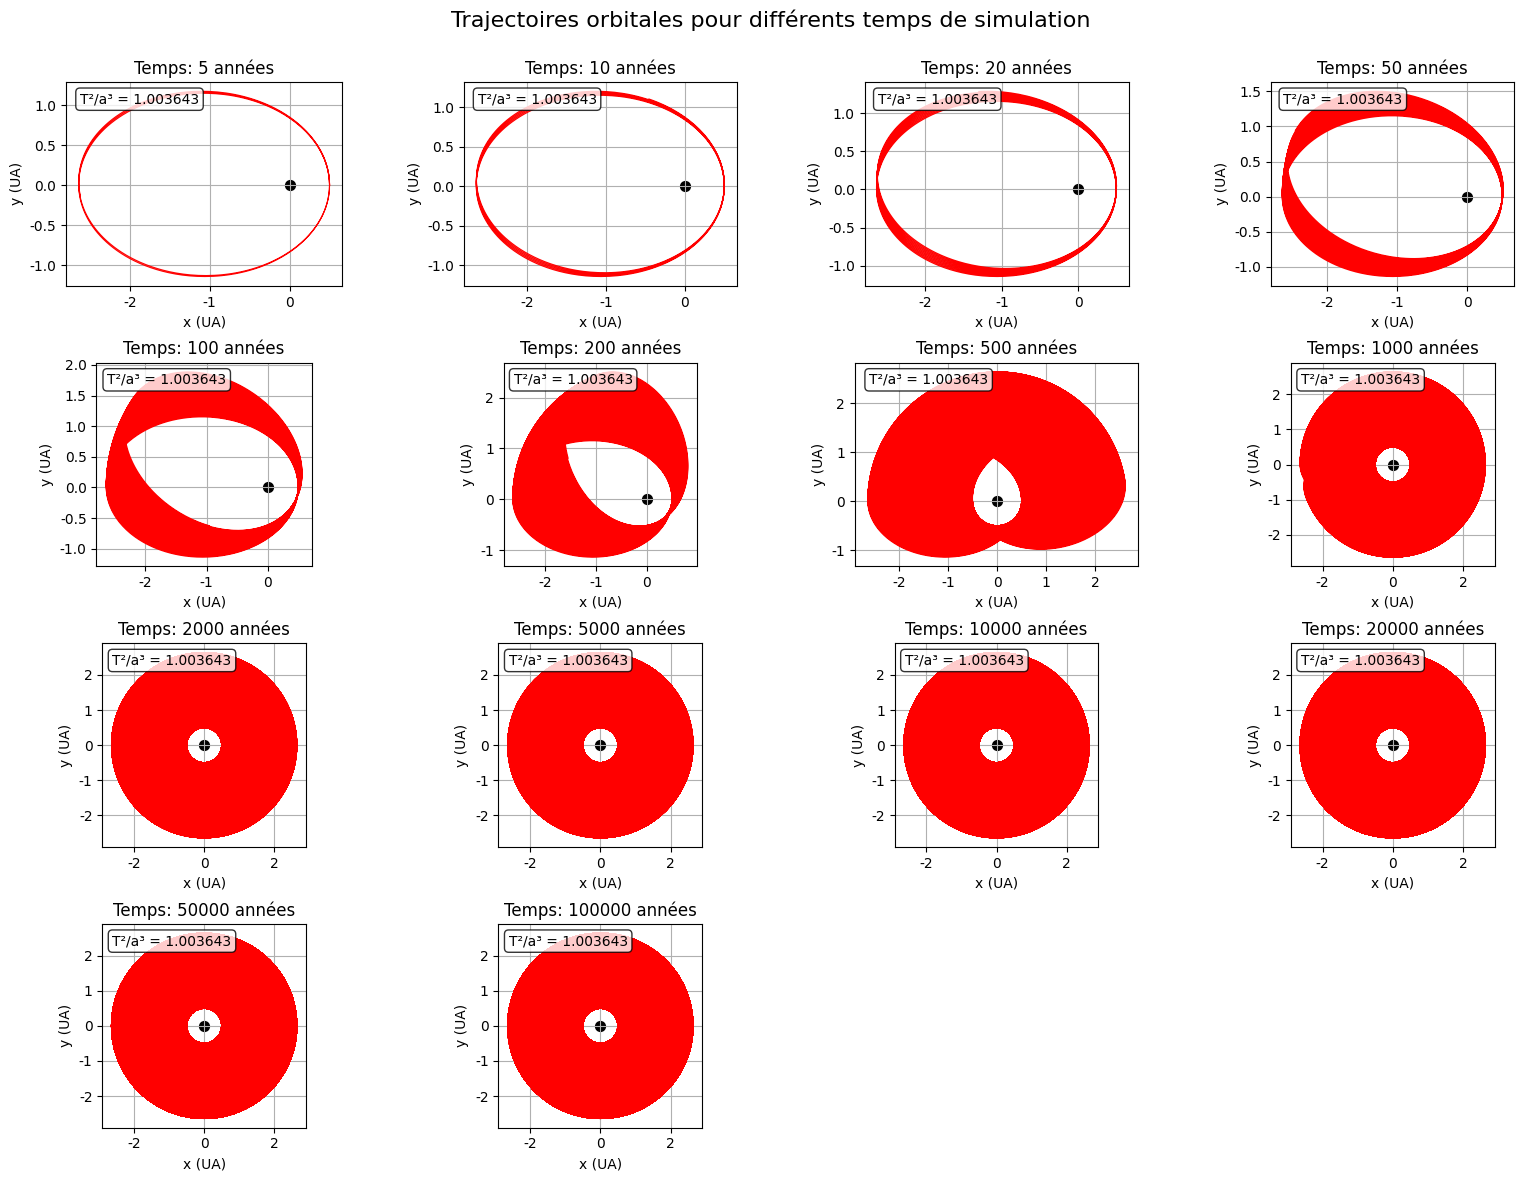

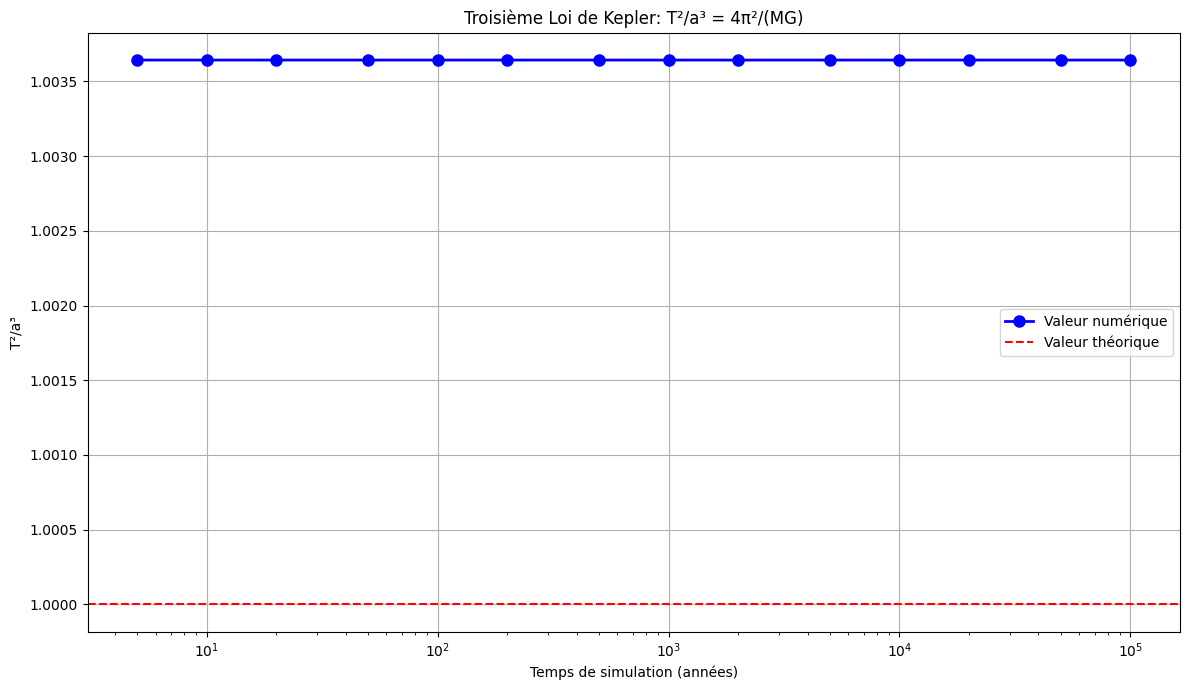

In [8]:
# Configuration pour les caractères français dans matplotlib
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

def k1(x, y, G, M):
    return (-G*M*x)/np.power((x**2+y**2), 3/2)

def l1(x, y, G, M):
    return (-G*M*y)/np.power((x**2+y**2), 3/2)

def k2(u, v):
    return u

def l2(u, v):
    return v


# Calcul des paramètres orbitaux (demi-grand axe et période)
def calculate_orbital_parameters(x, y, t):
    r = np.sqrt(x**2 + y**2)
    r_min = np.min(r)
    r_max = np.max(r)

    # Demi-grand axe pour une orbite elliptique
    a = (r_max + r_min) / 2

    # Détection de la période orbitale en utilisant la position angulaire
    theta = np.arctan2(y, x)
    theta_unwrapped = np.unwrap(theta)

    # Trouver quand nous complétons une orbite complète (changement de 2π)
    period = None
    for i in range(1, len(theta_unwrapped)):
        if (theta_unwrapped[i] - theta_unwrapped[0]) >= 2*np.pi:
            period = t[i] - t[0]
            break

    return a, period

# Fonction principale pour démontrer la croissance d'erreur avec le temps
def simuler_croissance_erreur_kepler():
    # Paramètres fixes
    x0 = 0.5       # position initiale x (UA)
    y0 = 0.0       # position initiale y (UA)
    x_prime0 = 0.0 # vitesse initiale x
    y_prime0 = 11.5 # vitesse initiale y

    # Constantes physiques
    G = 4 * np.pi**2  # Constante gravitationnelle en UA, années, masses solaires
    M = 1.0           # Masse de l'étoile (masses solaires)

    # Valeur théorique de la troisième loi de Kepler
    valeur_theorique = 1.0  # T²/a³ doit être égal à 1 dans ces unités

    # Pas fixe
    h = 0.01
    beta_RK = 0.5
    seuil = 0.0001

    # Temps de simulation croissants
    temps_simulation = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]

    # Stocker les résultats
    valeurs_kepler = []

    print("Exécution des simulations avec pas fixe h =", h)
    print("Valeur théorique de T²/a³ =", valeur_theorique)
    print("\nRésultats de simulation:")
    print("------------------------")
    print(f"{'Temps':>10} | {'Demi-grand axe':>15} | {'Période':>10} | {'T²/a³':>10}")
    print("-" * 55)

    # Créer figure pour les graphiques d'orbite (utilisation d'une grille adaptée)
    nrows = 4
    ncols = 4  # Nous aurons besoin de 13 graphiques sur une grille 4x4
    fig_orbites = plt.figure(figsize=(16, 12))

    # Exécuter des simulations pour différentes durées
    for i, t_max in enumerate(temps_simulation):
        # Exécuter la simulation
        # x, y, t, vx, vy = fct_RK2_2D(x0, y0, x_prime0, y_prime0, 0, t_max, h, beta_RK, G, M)
        x, y, t = fct_Verlet_2D(x0, y0, x_prime0, y_prime0, 0, t_max, h, k1, k2, l1, l2, G, M)

        # Mesurer les paramètres orbitaux
        a, periode = calculate_orbital_parameters(x, y, t)

        # Calculer la valeur de la troisième loi de Kepler
        if periode is not None:
            valeur_kepler = periode**2 / a**3
        else:
            valeur_kepler = None

        # Stocker les résultats
        valeurs_kepler.append(valeur_kepler)

        # Afficher les résultats
        if periode is not None and valeur_kepler is not None:
            print(f"{t_max:10.1f} | {a:15.6f} | {periode:10.6f} | {valeur_kepler:10.6f}")
        else:
            print(f"{t_max:10.1f} | {a:15.6f} | {'Non défini':<10} | {'Non défini':<10}")

        # Tracer l'orbite
        if i < nrows * ncols:  # S'assurer que nous ne dépassons pas le nombre de sous-graphiques
            ax = fig_orbites.add_subplot(nrows, ncols, i+1)
            ax.plot(x, y, 'r-', linewidth=0.8)
            ax.scatter(0, 0, color='black', s=50)
            ax.set_title(f"Temps: {t_max} années")
            ax.set_xlabel("x (UA)")
            ax.set_ylabel("y (UA)")
            ax.grid(True)
            ax.set_aspect('equal')

            # Ajouter du texte avec la valeur de la loi de Kepler
            if valeur_kepler is not None:
                ax.text(0.05, 0.95, f"T²/a³ = {valeur_kepler:.6f}", transform=ax.transAxes,
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            else:
                ax.text(0.05, 0.95, "T²/a³ = Non défini", transform=ax.transAxes,
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Ajuster la mise en page
    plt.tight_layout()
    plt.suptitle("Trajectoires orbitales pour différents temps de simulation", fontsize=16)
    plt.subplots_adjust(top=0.92)

    # Créer une figure pour la comparaison de la troisième loi de Kepler
    plt.figure(figsize=(12, 7))

    # Utiliser une échelle logarithmique pour l'axe x en raison de la grande plage de temps
    plt.semilogx([t for t, v in zip(temps_simulation, valeurs_kepler) if v is not None],
                [v for v in valeurs_kepler if v is not None],
                'bo-', linewidth=2, markersize=8, label='Valeur numérique')
    plt.axhline(y=valeur_theorique, color='r', linestyle='--', label='Valeur théorique')
    plt.xlabel('Temps de simulation (années)')
    plt.ylabel('T²/a³')
    plt.title("Troisième Loi de Kepler: T²/a³ = 4π²/(MG)")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

    return temps_simulation, valeurs_kepler

# Exécuter la simulation
temps_simulation, valeurs_kepler = simuler_croissance_erreur_kepler()